# GRIP: The Spark Foundation

### Data Science and Business Analytics intern

### Author : JISHNU M

### Batch : July 2022

### Task 7: Stock Market prediction using numerical and textual analysis

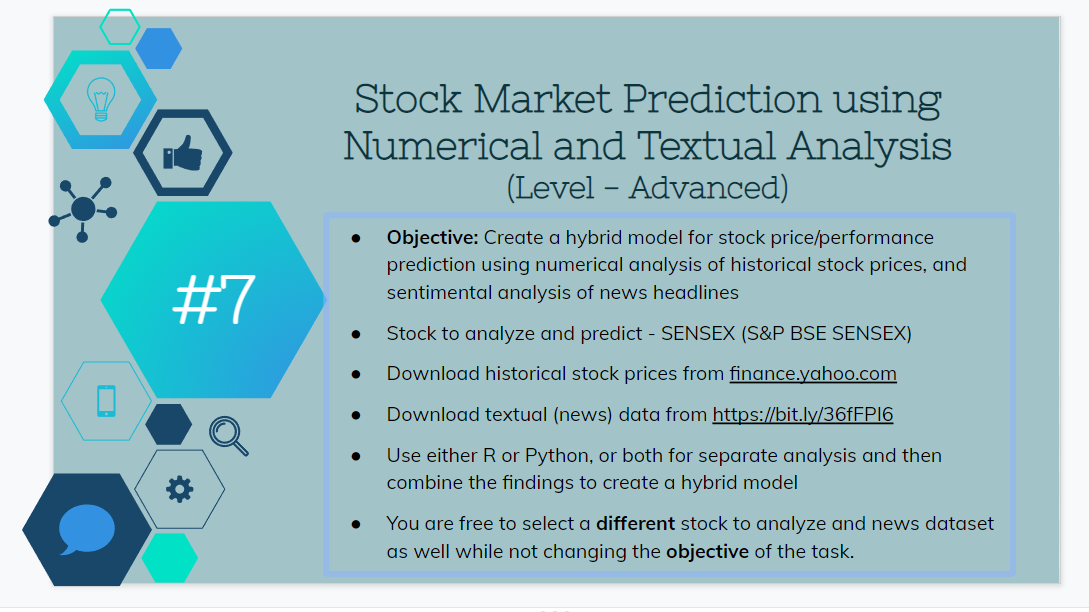

## Importing essential libraries

In [1]:
import nltk
# nltk.download("vader_lexicon")

import math
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Reading data

In [2]:
stock_price = pd.read_csv("C:\\Users\\jishn\\Downloads\\AAPL_3.csv")

# https://bit.ly/36fFPI6
news_headlines = pd.read_csv("D:\\STUDY\\Spark\\india-news-headlines.csv")

In [3]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-10,36.027500,36.487499,35.842499,36.264999,34.330853,84362400
1,2017-07-11,36.182499,36.462502,36.095001,36.382500,34.442085,79127200
2,2017-07-12,36.467499,36.544998,36.205002,36.435001,34.491791,99538000
3,2017-07-13,36.375000,37.122501,36.360001,36.942501,34.972214,100797600
4,2017-07-14,36.992500,37.332500,36.832500,37.259998,35.272778,80528400


In [4]:
news_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [6]:
news_headlines = news_headlines[news_headlines.publish_date>20170710]
news_headlines.head()

publish_date                             headline_category  \
2683423      20170711                                    city.patna   
2683424      20170711                                city.ahmedabad   
2683425      20170711                                      city.goa   
2683426      20170711  life-style.health-fitness.every-heart-counts   
2683427      20170711                       life-style.fashion.buzz   

                                   headline_text  
2683423    9;250 cases disposed of at Lok Adalat  
2683424       GST may push kites out of business  
2683425     Driver hurt in fight outside airport  
2683426                              Old is gold  
2683427  Guys; here's how to dress for the rains

In [7]:
print("Stock Price Data Shape: ", stock_price.shape[0], "×", stock_price.shape[1])
print("News Headlines Data Shape: ", news_headlines.shape[0], "×", news_headlines.shape[1])

Stock Price Data Shape:  1259 × 7
News Headlines Data Shape:  967547 × 3


In [8]:
stock_price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
news_headlines.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

## Feature engineering

In [10]:
# Dropping duplicates
stock_price = stock_price.drop_duplicates()

# Coverting the datatype of column 'Date' from type object to type 'datetime'
stock_price["Date"] = pd.to_datetime(stock_price["Date"])

# Filtering the important columns required
stock_price = stock_price.filter(["Date", "Close", "Open", "High", "Low", "Volume"])

# Setting column 'Date' as the index column
stock_price.set_index("Date", inplace = True)

# Sorting the data according to the index i.e 'Date'
stock_price = stock_price.sort_index(ascending = True, axis = 0)
stock_price.head(3)

,Close,Open,High,Low,Volume
Date,,,,,
2017-07-10,36.264999,36.027500,36.487499,35.842499,84362400
2017-07-11,36.382500,36.182499,36.462502,36.095001,79127200
2017-07-12,36.435001,36.467499,36.544998,36.205002,99538000


In [11]:
# Dropping duplicates
news_headlines = news_headlines.drop_duplicates()

# Coverting the datatype of column 'Date' from type object to type 'datetime'
news_headlines["publish_date"] = news_headlines["publish_date"].astype(str)
news_headlines["publish_date"] = news_headlines["publish_date"].apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:8])
news_headlines["publish_date"] = pd.to_datetime(news_headlines["publish_date"])

# Filtering the important columns required
news_headlines = news_headlines.filter(["publish_date", "headline_text"])

# Grouping the news headlines according to 'Date'
news_headlines = news_headlines.groupby(["publish_date"])["headline_text"].apply(lambda x: ','.join(x)).reset_index()

# Setting column 'Date' as the index column
news_headlines.set_index("publish_date", inplace= True)

# Sorting the data according to the index i.e 'Date'
news_headlines = news_headlines.sort_index(ascending=True, axis=0)
news_headlines.head(3)

,headline_text
publish_date,
2017-07-11,"9;250 cases disposed of at Lok Adalat,GST may ..."
2017-07-12,Lobo slams tourism dept for garbage on beaches...
2017-07-13,"Seminar clears queries about additional FSI,Pl..."


## Merging Stock Price and News Headlines

In [12]:
stock_data = pd.concat([stock_price, news_headlines], axis = 1)
stock_data.dropna(axis = 0, inplace = True)
stock_data.head()

<bound method NDFrame.head of                  Close        Open        High         Low       Volume  \
2017-07-11   36.382500   36.182499   36.462502   36.095001   79127200.0   
2017-07-12   36.435001   36.467499   36.544998   36.205002   99538000.0   
2017-07-13   36.942501   36.375000   37.122501   36.360001  100797600.0   
2017-07-14   37.259998   36.992500   37.332500   36.832500   80528400.0   
2017-07-17   37.389999   37.205002   37.724998   37.142502   95174000.0   
...                ...         ...         ...         ...          ...   
2022-03-25  174.720001  173.880005  175.279999  172.750000   80546200.0   
2022-03-28  175.600006  172.169998  175.729996  172.000000   90371900.0   
2022-03-29  178.960007  176.690002  179.009995  176.339996  100589400.0   
2022-03-30  177.770004  178.550003  179.610001  176.699997   92633200.0   
2022-03-31  174.610001  177.839996  178.029999  174.399994  103049300.0   

                                                headline_text  
2017-

In [13]:
stock_data.head()

,Close,Open,High,Low,Volume,headline_text
2017-07-11,36.382500,36.182499,36.462502,36.095001,79127200.0,"9;250 cases disposed of at Lok Adalat,GST may ..."
2017-07-12,36.435001,36.467499,36.544998,36.205002,99538000.0,Lobo slams tourism dept for garbage on beaches...
2017-07-13,36.942501,36.375000,37.122501,36.360001,100797600.0,"Seminar clears queries about additional FSI,Pl..."
2017-07-14,37.259998,36.992500,37.332500,36.832500,80528400.0,Govt; spiritual organizations begin conservati...
2017-07-17,37.389999,37.205002,37.724998,37.142502,95174000.0,Fear of 'inevitable' forced Corpn to curb wate...


## Calculating sentiment or polarity scores

The compound score is the sum of positive negative and neutral scores, which then normalized between -1 and +1. The compound score value near +1 means higher the positivity of the text.

In [14]:
# Adding empty sentiment columns to stock_data for later calculation
stock_data["Positive"] = ""
stock_data["Negative"] = ""
stock_data["Neutral"] = ""
stock_data["Compound"] = ""




In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

SIA = SentimentIntensityAnalyzer()
# Calculating sentiment scores
stock_data["Compound"] = stock_data["headline_text"].apply(lambda x: SIA.polarity_scores(str(x))["compound"])


In [17]:
stock_data["Negative"] = stock_data["headline_text"].apply(lambda x: SIA.polarity_scores(str(x))["neg"])


In [18]:
stock_data["Neutral"] = stock_data["headline_text"].apply(lambda x: SIA.polarity_scores(str(x))["neu"])



In [19]:
stock_data["Positive"] = stock_data["headline_text"].apply(lambda x: SIA.polarity_scores(str(x))["pos"])


In [20]:
# Dropping the 'headline_text' which is unwanted now
stock_data.drop(["headline_text"], inplace = True, axis = 1)

# Rearranging the columns of the whole stock_data
stock_data = stock_data[["Close", "Compound", "Negative", "Neutral", "Positive", "Open", "High", "Low", "Volume"]]
stock_data.head(3)

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
2017-07-11,36.382500,-0.9999,0.133,0.785,0.082,36.182499,36.462502,36.095001,79127200.0
2017-07-12,36.435001,-1.0000,0.166,0.753,0.081,36.467499,36.544998,36.205002,99538000.0
2017-07-13,36.942501,-0.9999,0.136,0.781,0.082,36.375000,37.122501,36.360001,100797600.0


In [60]:
#saving the stock data
stock_data.to_csv("stock_data.csv")

In [22]:
stock_data = pd.read_csv("stock_data.csv", index_col = False)

# Renaming the column
stock_data.rename(columns = {"Unnamed: 0":"Date"}, inplace = True)

# Setting the column 'Date' as the index column
stock_data.set_index("Date", inplace = True)
stock_data.head(3)

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
Date,,,,,,,,,
2017-07-11,36.382500,-0.9999,0.133,0.785,0.082,36.182499,36.462502,36.095001,79127200.0
2017-07-12,36.435001,-1.0000,0.166,0.753,0.081,36.467499,36.544998,36.205002,99538000.0
2017-07-13,36.942501,-0.9999,0.136,0.781,0.082,36.375000,37.122501,36.360001,100797600.0


In [59]:
#Stock data statistics
stock_data.describe(include = "all")

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1.191000e+03
mean,83.927880,-0.972799,0.131917,0.786778,0.081291,83.858128,84.813096,82.949490,1.210757e+08
std,44.133959,0.225561,0.018164,0.023455,0.012996,44.103022,44.645686,43.561775,5.588161e+07
min,35.547501,-1.000000,0.070000,0.728000,0.044000,35.994999,36.430000,35.500000,4.100000e+07
25%,46.156250,-0.999900,0.120000,0.770000,0.072500,46.092501,46.545000,45.676251,8.388080e+07
50%,63.215000,-0.999800,0.133000,0.783000,0.081000,62.685001,64.402496,61.762501,1.062040e+08
75%,125.314999,-0.999700,0.144000,0.801000,0.089000,125.155002,126.584999,123.938751,1.420208e+08
max,182.009995,0.999800,0.199000,0.877000,0.127000,182.630005,182.940002,179.119995,4.265100e+08


## Visualizations on Stock Data

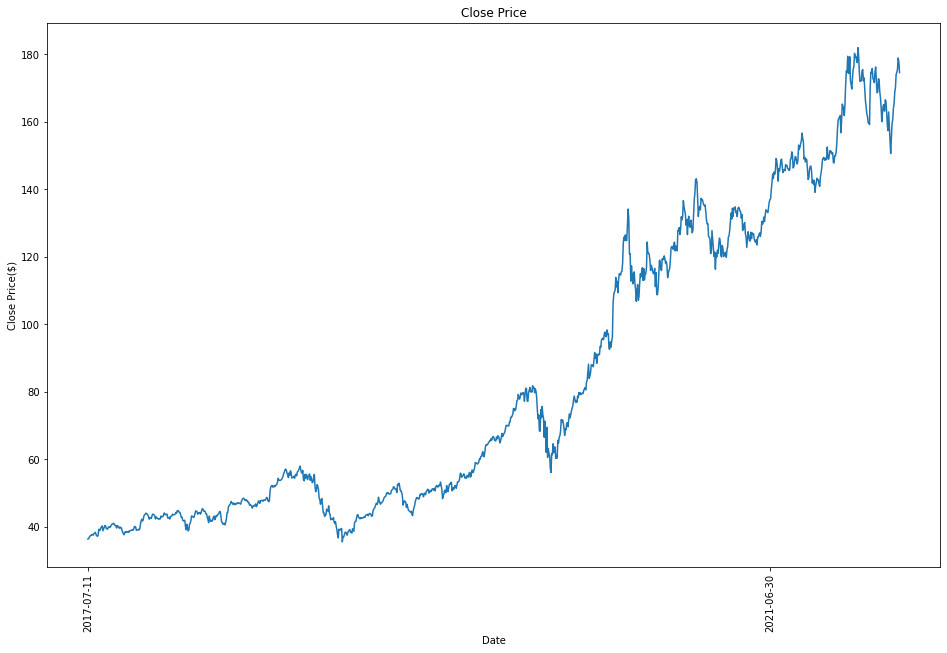

In [24]:
plt.figure(figsize = (16, 10))
ax = sns.lineplot(x = stock_data.index, y = stock_data["Close"])
ax.set_xticks(ax.get_xticks()[::1000])
plt.xlabel("Date")
plt.ylabel("Close Price($)")
plt.xticks(rotation = 90)
plt.title("Close Price")
plt.show()

### Correlation map

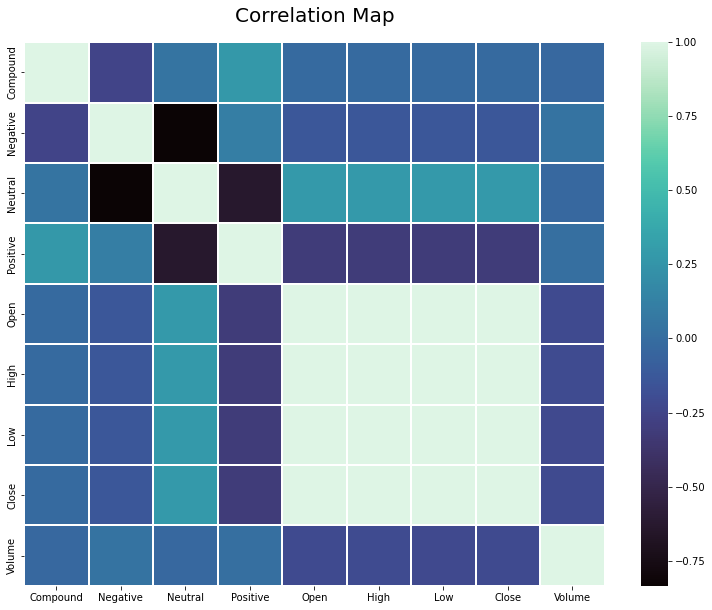

In [25]:
plt.figure(figsize = (13, 10))
sns.heatmap(
    stock_data[['Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High',
       'Low', 'Close', 'Volume']].corr(),
    linewidths = .1, 
    cmap = sns.color_palette("mako", as_cmap=True), 
)
plt.title(
    "Correlation Map",
    fontsize = 20,
    pad = 20
)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [57]:
#Calculating 4 day rolling mean
stock_data.rolling(4).mean().head(10)

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
Date,,,,,,,,,
2017-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-14,36.755000,-0.999925,0.14250,0.77625,0.08125,36.504374,36.865625,36.373126,89997800.0
2017-07-17,37.006875,-0.999875,0.14050,0.77500,0.08450,36.760000,37.181249,36.635001,94009500.0
2017-07-18,37.278124,-0.999800,0.12650,0.79100,0.08275,36.968125,37.428125,36.875626,86993800.0
2017-07-19,37.481249,-0.999800,0.12750,0.78900,0.08375,37.279375,37.611250,37.157500,82717400.0
2017-07-20,37.562500,-0.999775,0.12875,0.78400,0.08700,37.500000,37.761875,37.336250,79829000.0
2017-07-21,37.606875,-0.998075,0.12150,0.79225,0.08600,37.573125,37.733126,37.355625,82288100.0


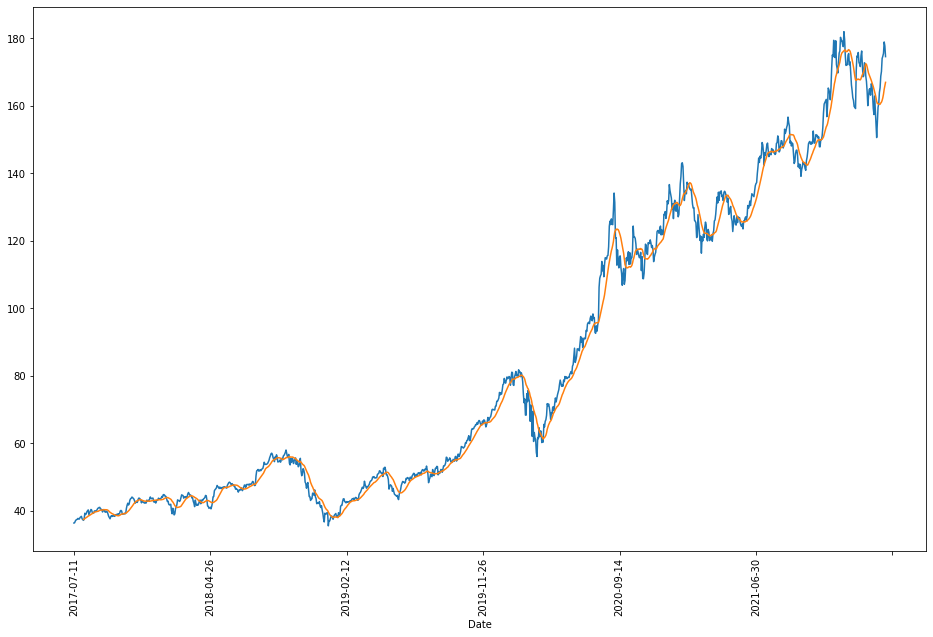

In [31]:
# Plotting the close price and a 15-day rolling mean of close price
plt.figure(figsize = (16, 10))
stock_data["Close"].plot()
stock_data.rolling(window = 15).mean()["Close"].plot()
plt.xticks(rotation = 90)
plt.show()

## Data Preperation for model creation

In [32]:
time_step = 1
training_size = int(len(stock_data) * 0.80)
test_size = len(stock_data) - training_size
train_data, test_data = stock_data.iloc[0:training_size, :], stock_data.iloc[training_size - time_step:len(stock_data), :]

In [33]:
def create_dataset(data, time_step = 1):
    features = [data["Close"]]
    feature_names = ["Close"]
    for i in range(1, time_step + 1):
        feature = "cp_shifted_{k}".format(k = i)
        feature_names.append(feature)
        temp = data["Close"].shift((-1 * i))
        features.append(temp);
        
    features.append(data["Compound"]) 
    feature_names.append("Compound")
    for i in range(1, time_step + 1):
        feature = "compound_shifted_{k}".format(k = i)
        feature_names.append(feature)
        temp = data["Compound"].shift((-1 * i))
        features.append(temp);
    
    
    df = pd.concat(features, axis=1)
    df.columns = feature_names
    df = df.shift(periods = time_step)
    df = df.dropna()
    return df

In [34]:
X_train = create_dataset(train_data, time_step)
X_test = create_dataset(test_data, time_step)

In [35]:
y_train = X_train["cp_shifted_{t}".format(t = time_step)]
y_test = X_test["cp_shifted_{t}".format(t = time_step)]

In [36]:
X_train.drop(columns = ["cp_shifted_{t}".format(t = time_step)], inplace = True)
X_test.drop(columns = ["cp_shifted_{t}".format(t = time_step)], inplace = True)

In [37]:
X_train.shape, X_test.shape

((951, 3), (239, 3))

## Scaling the target variable and feature dataset

LSTM can be very sensitive to the scale of the data, So Here I use MinMaxScaler to scale each input variable separately to the range 0-1.

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

X_train = scaler.fit_transform(np.array(X_train))
y_train = scaler.fit_transform(np.array(y_train).reshape((len(y_train), 1)))

X_test = scaler.fit_transform(np.array(X_test))
y_test = scaler.fit_transform(np.array(y_test).reshape((len(y_test), 1)))

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((951, 3), (951, 1), (239, 3), (239, 1))

## Dividing dataset into training and testing

As this is time series data, we cannot use train_test_split but we have to manualy split data like this.

In [41]:
# Reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# Printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (951, 3, 1)
Shape of Test set X: (239, 3, 1)


## Modelling Stock Data

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation

In [43]:
# Creating the model architecture
model=Sequential()
model.add(LSTM(60,return_sequences=True,activation='tanh',input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(120,return_sequences=True,activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(240,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# Printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 60)             14880     
                                                                 
 dropout (Dropout)           (None, 3, 60)             0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 120)            86880     
                                                                 
 dropout_1 (Dropout)         (None, 3, 120)            0         
                                                                 
 lstm_2 (LSTM)               (None, 240)               346560    
                                                                 
 dropout_2 (Dropout)         (None, 240)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [44]:
# Compiling the model
model.compile(loss='mse' , optimizer='adam')

# Fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=16, verbose=1)

Epoch 1/25
48/48 [==============================] - 7s 42ms/step - loss: 0.0137 - val_loss: 0.0099
Epoch 2/25
48/48 [==============================] - 1s 13ms/step - loss: 0.0032 - val_loss: 0.0111
Epoch 3/25
48/48 [==============================] - 1s 12ms/step - loss: 0.0024 - val_loss: 0.0280
Epoch 4/25
48/48 [==============================] - 1s 12ms/step - loss: 0.0019 - val_loss: 0.0174
Epoch 5/25
48/48 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0200
Epoch 6/25
48/48 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0147
Epoch 7/25
48/48 [==============================] - 1s 12ms/step - loss: 7.6817e-04 - val_loss: 0.0127
Epoch 8/25
48/48 [==============================] - 1s 12ms/step - loss: 7.7793e-04 - val_loss: 0.0018
Epoch 9/25
48/48 [==============================] - 1s 12ms/step - loss: 4.7731e-04 - val_loss: 7.4335e-04
Epoch 10/25
48/48 [==============================] - 1s 12ms/step - loss: 5.1653e-04 - val_lo

## Predictions

In [45]:
predictions = model.predict(X_test) 

# Unscaling the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# Printing the predictions
print('Predictions:')
predictions[0:5]

8/8 [==============================] - 1s 5ms/step
Predictions:


array([[133.58403],
       [131.94052],
       [134.44835],
       [134.87062],
       [134.52164]], dtype=float32)

In [46]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 7ms/step


In [47]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.95928801892993

In [49]:
math.sqrt(mean_squared_error(y_test,test_predict))

152.7691774752884

## Model evaluation

In [50]:
# Calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# Calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# Printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

239/239 [==============================] - 1s 3ms/step - loss: 0.0020
Train Loss = 0.0005
Test Loss = 0.002


In [51]:
from sklearn import metrics

In [52]:
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 152.7692


In [53]:
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 152.7692


## Plotting the predictions against unseen data

In [54]:
X_test = scaler.inverse_transform(np.array(X_test).reshape((len(X_test), 3)))

# Unscaling y_test, y_train
y_train = scaler.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

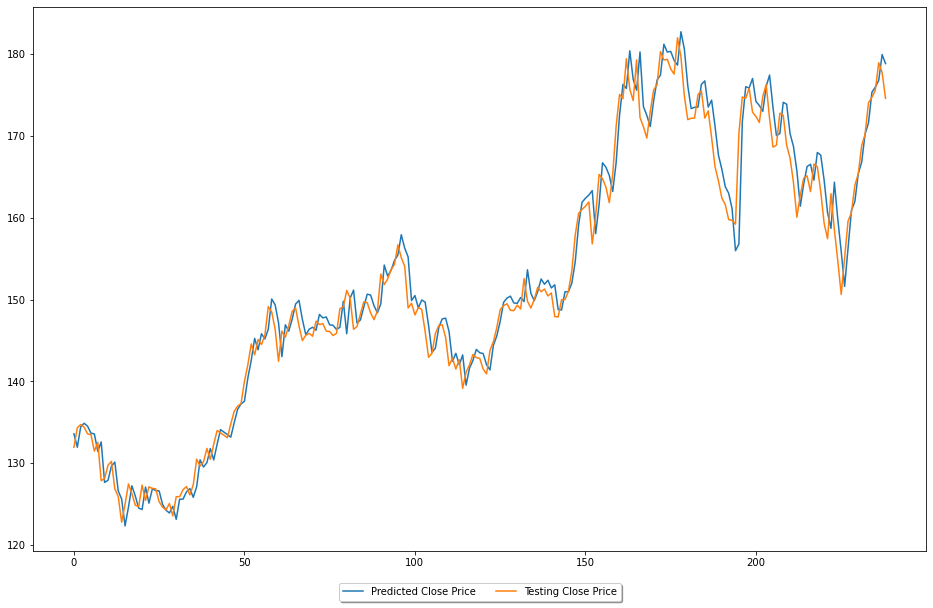

In [55]:
# Plotting
plt.figure(figsize=(16,10))

plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()

# Thank you